library

In [1]:
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Price.csv")
df

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


PreProcess

In [5]:
stock_df = df[df.symbol == 'YHOO'] #choose one stock
print(stock_df)

              date symbol       open  ...        low       high      volume
713     2010-01-04   YHOO  16.940001  ...  16.879999  17.200001  16587400.0
1181    2010-01-05   YHOO  17.219999  ...  17.000000  17.230000  11718100.0
1649    2010-01-06   YHOO  17.170000  ...  17.070000  17.299999  16422000.0
2117    2010-01-07   YHOO  16.809999  ...  16.570000  16.900000  31816300.0
2585    2010-01-08   YHOO  16.680000  ...  16.620001  16.760000  15470000.0
...            ...    ...        ...  ...        ...        ...         ...
849257  2016-12-23   YHOO  38.459999  ...  38.369999  38.810001   3840100.0
849757  2016-12-27   YHOO  38.590000  ...  38.500000  39.070000   4240300.0
850257  2016-12-28   YHOO  39.119999  ...  38.709999  39.220001   4393500.0
850757  2016-12-29   YHOO  38.759998  ...  38.480000  38.930000   4170200.0
851257  2016-12-30   YHOO  38.720001  ...  38.430000  39.000000   6431600.0

[1762 rows x 7 columns]


In [6]:
stock_df.tail()

,date,symbol,open,close,low,high,volume
849257,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0
849757,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
850257,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
850757,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0
851257,2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0


In [6]:
stock_df_dates = pd.to_datetime(df['date'])
print(stock_df_dates)


0        2016-01-05
1        2016-01-06
2        2016-01-07
3        2016-01-08
4        2016-01-11
            ...    
851259   2016-12-30
851260   2016-12-30
851261   2016-12-30
851262   2016-12-30
851263   2016-12-30
Name: date, Length: 851264, dtype: datetime64[ns]


In [8]:
cols = list(stock_df)[2:7]
print(cols)
df_training = stock_df[cols].astype(float)
print(df_training)

['open', 'close', 'low', 'high', 'volume']
             open      close        low       high      volume
713     16.940001  17.100000  16.879999  17.200001  16587400.0
1181    17.219999  17.230000  17.000000  17.230000  11718100.0
1649    17.170000  17.170000  17.070000  17.299999  16422000.0
2117    16.809999  16.700001  16.570000  16.900000  31816300.0
2585    16.680000  16.700001  16.620001  16.760000  15470000.0
...           ...        ...        ...        ...         ...
849257  38.459999  38.660000  38.369999  38.810001   3840100.0
849757  38.590000  38.919998  38.500000  39.070000   4240300.0
850257  39.119999  38.730000  38.709999  39.220001   4393500.0
850757  38.759998  38.639999  38.480000  38.930000   4170200.0
851257  38.720001  38.669998  38.430000  39.000000   6431600.0

[1762 rows x 5 columns]


In [9]:
scaler = StandardScaler()
scaler = scaler.fit(df_training)
df_training_scaled = scaler.transform(df_training)

df_training_scaled.shape

(1762, 5)

In [10]:
#splitting
train_size = int(len(df_training_scaled)*.8)
test_size = len(df_training_scaled)-train_size
train_data = df_training_scaled[0:train_size,:]
test_data = df_training_scaled[train_size:len(df_training_scaled),:] 

In [11]:
#data for lstm
n_future = 1
n_past = 14

trainx = []
trainy = []

for i in range(n_past, len(train_data) - n_future +1):
   trainx.append(train_data[i - n_past:i, 0:train_data.shape[1]])
   trainy.append(train_data[i + n_future-1:i + n_future, 0])
  
trainX , trainY = np.array(trainx) , np.array(trainy)

testx = []
testy = []

for i in range(n_past, len(test_data) - n_future +1):
   testx.append(test_data[i - n_past:i, 0:train_data.shape[1]])
   testy.append(test_data[i + n_future-1:i + n_future, 0])
  
testX , testY = np.array(testx) , np.array(testy)

print("trainX shape == {}.".format(trainX.shape))
print("trainY shape == {}.".format(trainY.shape))
print("testX shape == {}.".format(testX.shape))
print("testY shape == {}.".format(testY.shape))


trainX shape == (1395, 14, 5).
trainY shape == (1395, 1).
testX shape == (339, 14, 5).
testY shape == (339, 1).


In [24]:
x_train = torch.from_numpy(trainX).type(torch.Tensor)
x_test = torch.from_numpy(testX).type(torch.Tensor)
y_train = torch.from_numpy(trainY).type(torch.Tensor)
y_test = torch.from_numpy(testY).type(torch.Tensor)

In [25]:
x_test.size()

torch.Size([339, 14, 5])

In [14]:
# Hyper-parameters 
input_size = 5
seq_length = 14
hidden_size = 2
num_classes = 1
batch_size = 16
learning_rate = 0.001
num_layers = 1
num_timesteps = 14

In [26]:

train = torch.utils.data.TensorDataset(x_train,y_train)
test = torch.utils.data.TensorDataset(x_test,y_test)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [27]:
test_loader

Model

In [15]:
class MV_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MV_LSTM, self).__init__()
        self.input_size = input_size
        self.num_layers = num_layers 
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) 
        #(batch, seq, input)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_size*seq_length, 1)

    def init_hidden(self, batch_size):
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size) 
        self.hidden = (h0,c0)
   
    def forward(self, x):
        batch_size, seq_length, _ = x.size()
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        x = lstm_out.contiguous().view(batch_size, -1)
        out = self.fc(x)
        return out

mv_model = MV_LSTM(input_size, hidden_size).to(device)

In [16]:
#create
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(mv_model.parameters(), lr=learning_rate)  
print(mv_model)

MV_LSTM(
  (lstm): LSTM(5, 2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=28, out_features=1, bias=True)
)


In [70]:
#Training
train_episodes = 100
hist = np.zeros(train_episodes)
mv_model.train()
for t in range(train_episodes):
    for b in range(0,len(trainX),batch_size):
        inpt = trainX[b:b+batch_size,:,:]
        target =trainY[b:b+batch_size]    
        
        x_batch = torch.tensor(inpt,dtype=torch.float32)    
        y_batch = torch.tensor(target,dtype=torch.float32)
       
    
        mv_model.init_hidden(x_batch.size(0))
    #    lstm_out, _ = mv_net.l_lstm(x_batch,nnet.hidden)    
    #    lstm_out.contiguous().view(x_batch.size(0),-1)
        output = mv_model(x_batch) 
        loss = criterion(output.view(-1), y_batch)
        hist[t] = loss.item()
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()   


    if t % 10 == 0 and t !=0:
      print('epoch : ' , t , 'loss : ' , loss.item())



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3, 1])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch :  10 loss :  0.0018423907458782196
epoch :  20 loss :  0.0017257591243833303
epoch :  30 loss :  0.0016366703202947974
epoch :  40 loss :  0.0015701311640441418
epoch :  50 loss :  0.0015208745608106256
epoch :  60 loss :  0.0014845333062112331
epoch :  70 loss :  0.0014579554554075003
epoch :  80 loss :  0.001439007930457592
epoch :  90 loss :  0.001426180824637413


In [18]:
 x_batch.size()

torch.Size([3, 14, 5])

In [21]:
#def test():
 # correct = 0
  #total = 0
  #Tru = []
  #Pred = []
  #with torch.no_grad():
   # for data in test_loader:
   #   inpt, target = data
   #   inpt = inpt.to(device)
   #   target = target.to(device)
   #   Tru.append(target.item())
   #   out = mv_model(inpt)
   #   _, preds = torch.max(out.data, 1)
   #    total += target.size()
   #   correct += (preds == target).sum().item()
   # acc = correct/total
  #return(Tru, Pred, correct, total, acc)

In [72]:
test_episodes = 100
mv_model.eval()
for t in range(test_episodes):
    for b in range(0,len(testX),batch_size):
        inpt_t = testX[b:b+batch_size,:,:]
        target_t =testY[b:b+batch_size]    
        
        x_batch_t = torch.tensor(inpt_t,dtype=torch.float32)    
        y_batch_t = torch.tensor(target_t,dtype=torch.float32)
       
    
        mv_model.init_hidden(x_batch_t.size(0))
    #    lstm_out, _ = mv_net.l_lstm(x_batch,nnet.hidden)    
    #    lstm_out.contiguous().view(x_batch.size(0),-1)
        output_t = mv_model(x_batch_t) 
        loss = criterion(output_t.view(-1), y_batch_t)
        
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()   


    if t % 10 == 0 and t !=0:
      print('epoch : ' , t , 'loss : ' , loss.item())


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3, 1])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch :  10 loss :  0.0005161606823094189
epoch :  20 loss :  0.00045598490396514535
epoch :  30 loss :  0.0004289547214284539
epoch :  40 loss :  0.00042912515345960855
epoch :  50 loss :  0.00043777222163043916
epoch :  60 loss :  0.00044951107702217996
epoch :  70 loss :  0.0004624048597179353
epoch :  80 loss :  0.0004757371498271823
epoch :  90 loss :  0.0004892226424999535


<function matplotlib.pyplot.show>

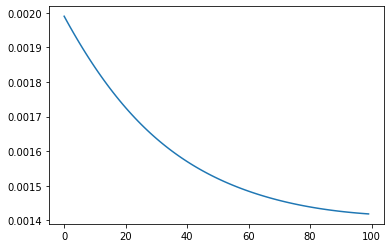

In [71]:
plt.figure()
plt.plot(hist, label="Training Loss")
plt.legend
plt.show